### 模型正则化Regularization
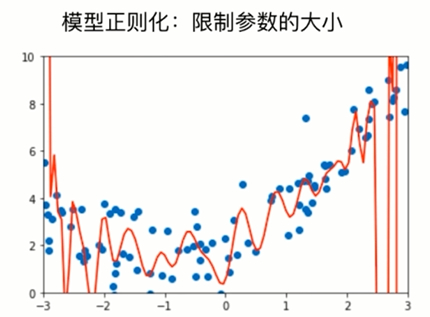

上面的例子是过拟合之后的例子，这个曲线非常弯曲，非常陡峭，每一个多项式前的系数有些会非常大，模型正则化限制前面的系数

In [1]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x  + 2 + x + np.random.normal(0, 1, size=100)

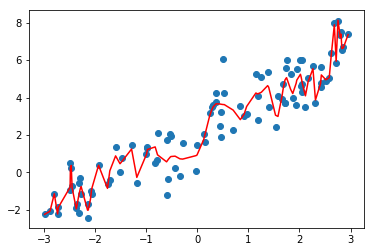

In [4]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)

from sklearn.metrics import mean_squared_error
mean_squared_error(y, y100_predict)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

In [5]:
lin_reg.coef_

array([-7.00268486e+11,  4.30385546e+00,  7.14595557e+01,  9.38505029e+02,
       -5.35638189e+03, -8.61812065e+04,  2.46827914e+05,  3.64966506e+06,
       -7.49352793e+06, -8.98578550e+07,  1.49319504e+08,  1.41196163e+09,
       -1.98873692e+09, -1.49966908e+10,  1.81785062e+10,  1.11712638e+11,
       -1.16427857e+11, -5.95936660e+11,  5.27003037e+11,  2.28937127e+12,
       -1.67017635e+12, -6.25037553e+12,  3.55483596e+12,  1.15817186e+13,
       -4.46495209e+12, -1.27101101e+13,  1.58298439e+12,  3.75619976e+12,
        3.71804973e+12,  8.54758083e+12, -3.82718222e+12, -6.98724187e+12,
       -2.60317255e+12, -6.09604508e+12,  3.26783343e+12,  5.39133372e+12,
        3.94247636e+12,  6.78623832e+12, -2.03492652e+12, -1.73617728e+12,
       -5.21056139e+12, -7.39740767e+12, -1.06624184e+12, -3.19946650e+12,
        4.37418970e+12,  4.79982750e+12,  4.91808629e+12,  6.35919444e+12,
       -8.68621282e+11,  1.08319169e+12, -3.88730791e+12, -3.73926142e+12,
       -4.74938378e+12, -

上面这些数就是过拟合的效果

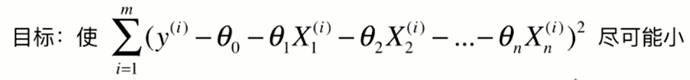

上面这个相当于求解下面这个
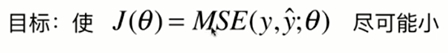

但是在这里，想要theta的系数小，旧的改变一下损失函数，加入模型正则化

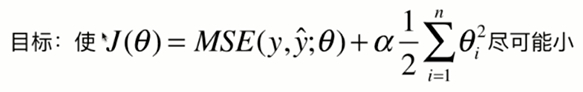

因为后面的式子里面，每一项都有一平方，所以前面加一个1/2，这个阿尔法是一个新的超参数，代表在模型化下，这个新的要每个theta都尽可能小的程度

### 领回归Ridge Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(88)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

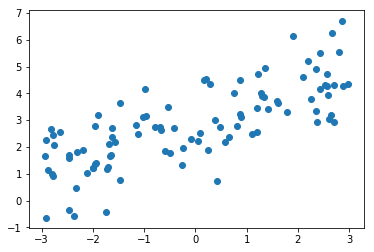

In [8]:
plt.scatter(x, y)

In [9]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

首先使用多项式回归的方式

In [10]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

1.5144320851929727

[-3, 3, 0, 6]

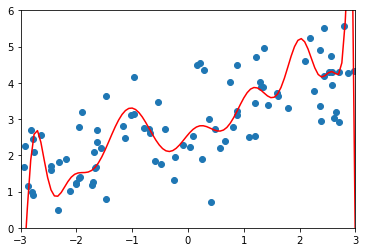

In [11]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3,3,0,6])

图形非常的弯曲, 两边的极端情况下，对数据尽心该预测，肯定是不准确的

In [12]:
# 对上面的函数进行封装
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3,3,0,6])

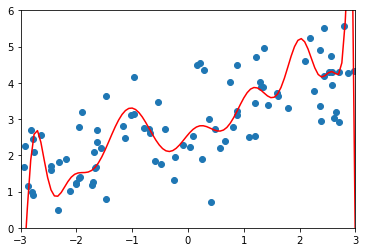

In [13]:
plot_model(poly_reg)

### 使用领回归

In [14]:
from sklearn.linear_model import Ridge

# ridge = Ridge(alpha=1)  # 不使用这种方法，改用前面的方式进行

使用管道的方式进行

In [15]:
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
#         ("lin_reg", LinearRegression())
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [16]:
ridge1_reg = RidgeRegression(20, 0.0001)   # 领回归，最后一项是theta的平法的和

In [17]:
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.6263857807337447

查看这个均方误差与前面的均方误差，稍作体会，就会感到这个管道方法的好处，这就是模型正则化的威力

可以尝试通过领回归的方式绘制一下图形

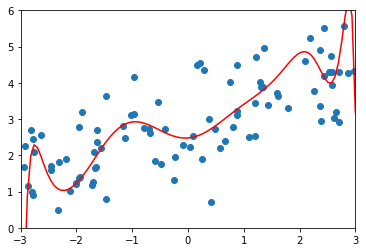

In [18]:
plot_model(ridge1_reg)

In [19]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.869863393027137

可以看出，比刚才的又好了一些

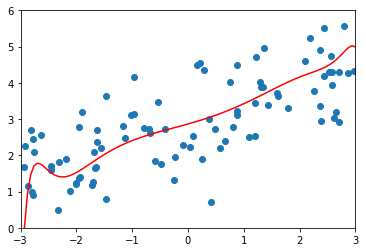

In [20]:
plot_model(ridge2_reg)

这里再做一个实验，让这个degree更大一些

In [21]:
ridge3_reg = RidgeRegression(100, 1)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)
# plot_model(ridge2_reg)

1.7148396648549342

上面这个说明了，degree再大的时候，正则化就效果不是太好了

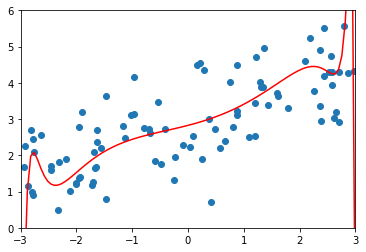

In [22]:
plot_model(ridge3_reg)

In [23]:
ridge4_reg = RidgeRegression(20, 100000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.6026589208440254

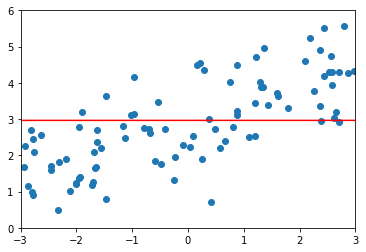

In [24]:
plot_model(ridge4_reg)

近乎就是一条直线了